# Time Series Forecasting with Prophet

Based on https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [6]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1 Load data

In [10]:
df = pd.read_csv('../data/AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## 2 Preprocess data

In [7]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [11]:
# Prophet requires this
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [12]:
# Prophet requires this too
df = df.rename(columns={'Month': 'ds', 'AirPassengers': 'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## 3 Visualize data

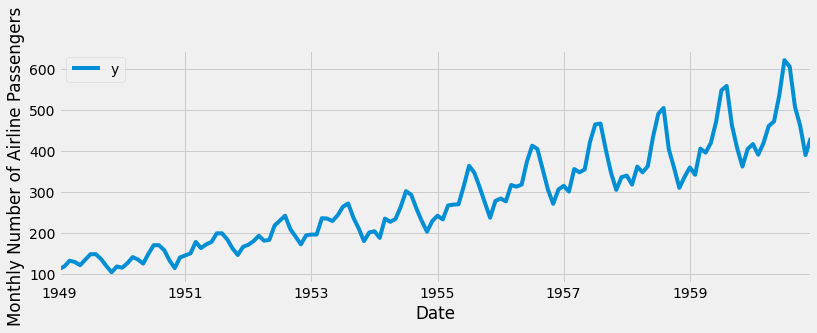

In [23]:
ax = df.set_index('ds').plot(figsize=(12, 4))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

## 4 Modeling with Prophet

In [24]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [26]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.787427,605.034153,691.440320
176,1963-09-01,602.260711,557.176723,646.356523
177,1963-10-01,566.233600,518.367524,609.780936
178,1963-11-01,534.258296,488.465938,581.315847
179,1963-12-01,563.846779,520.088784,607.434888


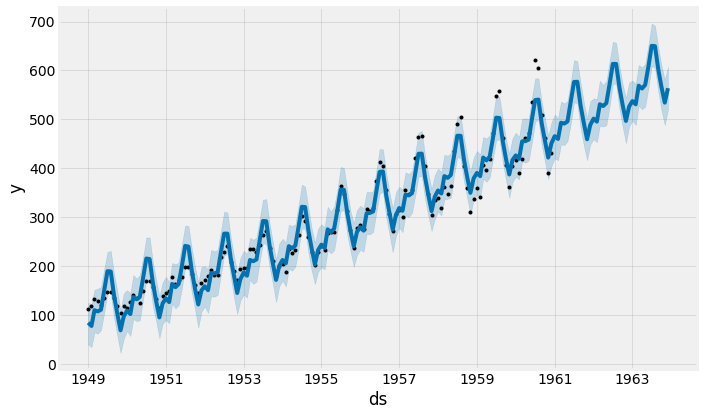

In [29]:
# Use semicolon to avoid doubled plot
# https://github.com/facebook/prophet/issues/396
my_model.plot(forecast, uncertainty=True);

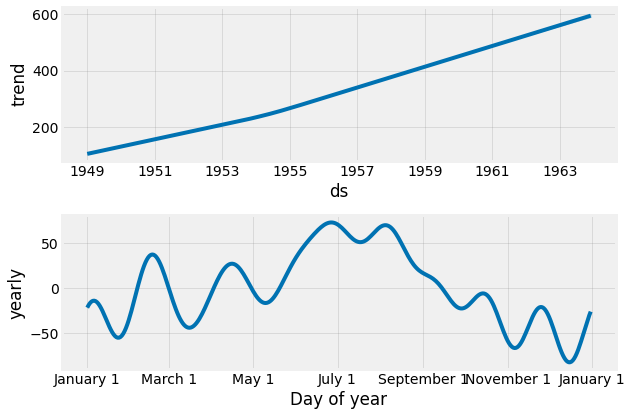

In [30]:
# Use semicolon to avoid doubled plot
# https://github.com/facebook/prophet/issues/396
my_model.plot_components(forecast);